
# News Text Classification

* News Category Dataset set from [Kaggle competition](https://www.kaggle.com/rmisra/news-category-dataset).
* Nice [sklearn tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html).



## 1. Understanding the data



In [1]:
import pandas as pd
import numpy as np
import pylab as plt
 
#this assumes one json item per line in json file
df=pd.read_json("./data/news_category_dataset.json", lines=True)

In [2]:
print ( 'df.types:\n',df.dtypes)
print ( '\n df.shape: ',df.shape)

df.types:
 short_description            object
headline                     object
date                 datetime64[ns]
link                         object
authors                      object
category                     object
dtype: object

 df.shape:  (124989, 6)


In [3]:
df.sample(4)

,short_description,headline,date,link,authors,category
34920,"""We never lost hope,"" an uncle in Chicago says.",Syrian Refugees Halted By Trump’s Travel Ban M...,2017-02-08,https://www.huffingtonpost.com/entry/syrian-re...,Kim Bellware,POLITICS
102627,,Teen Accused Of Threatening Police On Twitter,2014-12-31,https://www.huffingtonpost.com/entry/texas-tee...,,CRIME
77087,But the partisan divide on gun control is even...,Support For Stricter Gun Laws Has Jumped Since...,2015-10-19,https://www.huffingtonpost.com/entry/gun-contr...,Ariel Edwards-Levy,POLITICS
106383,While a host of progressive issues are dear to...,Democrats Need to Coalesce Around Hillary Clin...,2014-11-18,https://www.huffingtonpost.com/entry/democrats...,"Jeza Belle, ContributorDrag queen, comedian an...",POLITICS


In [4]:
df.columns

Index(['short_description', 'headline', 'date', 'link', 'authors', 'category'], dtype='object')

### 1.1 Date in the Data

In [5]:
print ('Date ranges from ', df.date.min().strftime('%Y-%m-%d'), 'to', df.date.max().strftime('%Y-%m-%d') )

Date ranges from  2014-04-18 to 2018-05-26


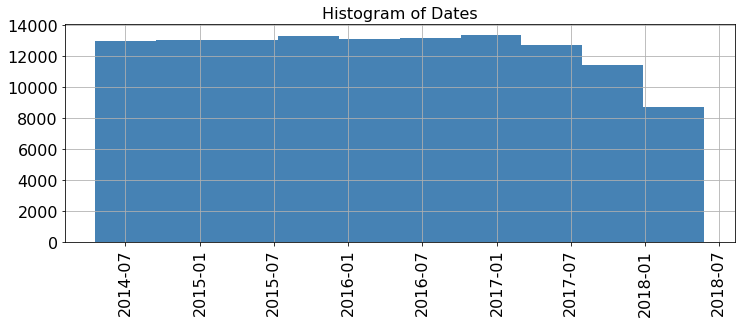

In [6]:
df.date.hist(color='steelblue', figsize=(12,4)) # lightskyblue
plt.title('Histogram of Dates',fontsize=16)
plt.xticks(fontsize=16, rotation=90);
plt.yticks(fontsize=16); #, color='maroon'


### 1.2 News Category

In [7]:
print ('Unique Catagories:\n', df.category.unique() )
print (f"\nThere are Total: {len(df.category.unique())} categories ")

Unique Catagories:
 ['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS']

There are Total: 31 categories 


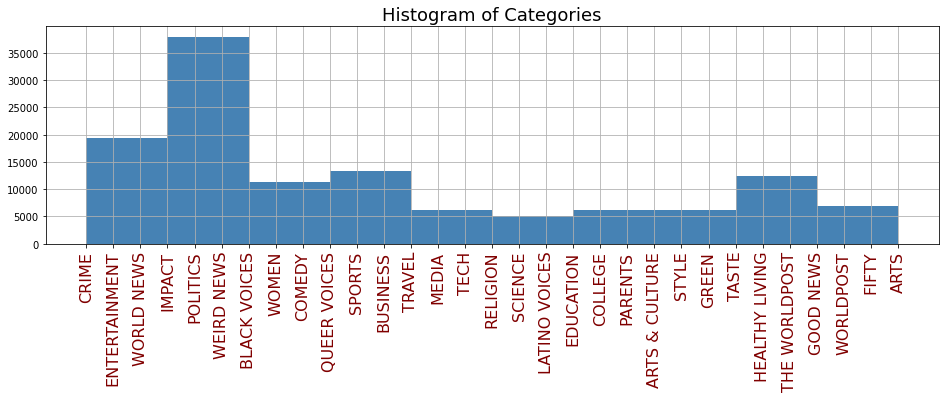

In [8]:
df.category.hist(color='steelblue', figsize=(16, 4)) # lightskyblue
plt.title('Histogram of Categories',fontsize=18)
plt.xticks(fontsize=16, rotation=90, color='maroon');

<font size="4" color='red'> NOTE: Be careful </font> in plotting the histogram as it gets the axes the wrong way round i.e. it tries to partition the y-axis (counts) into bins, and then plots the number of string labels in each bin.

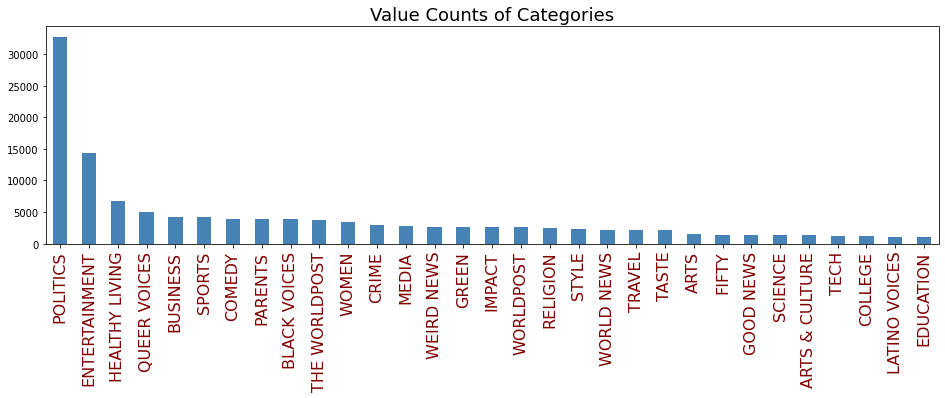

In [9]:
df.category.value_counts().plot(kind='bar', color='steelblue', figsize=(16, 4))
plt.title('Value Counts of Categories',fontsize=18)
plt.xticks(fontsize=16, rotation=90, color='maroon');

Politics has the highest number of articles and education has the least number (as expected) who cares about education!.

### 1.3  Words Count

In [10]:
from collections import Counter
all_cats = df.category.values
cc= Counter(all_cats)
print ( cc.items() )

print ( df.category.value_counts() )

dict_items([('CRIME', 2893), ('ENTERTAINMENT', 14257), ('WORLD NEWS', 2177), ('IMPACT', 2602), ('POLITICS', 32739), ('WEIRD NEWS', 2670), ('BLACK VOICES', 3858), ('WOMEN', 3490), ('COMEDY', 3971), ('QUEER VOICES', 4995), ('SPORTS', 4167), ('BUSINESS', 4254), ('TRAVEL', 2145), ('MEDIA', 2815), ('TECH', 1231), ('RELIGION', 2556), ('SCIENCE', 1381), ('LATINO VOICES', 1129), ('EDUCATION', 1004), ('COLLEGE', 1144), ('PARENTS', 3955), ('ARTS & CULTURE', 1339), ('STYLE', 2254), ('GREEN', 2622), ('TASTE', 2096), ('HEALTHY LIVING', 6694), ('THE WORLDPOST', 3664), ('GOOD NEWS', 1398), ('WORLDPOST', 2579), ('FIFTY', 1401), ('ARTS', 1509)])
POLITICS          32739
ENTERTAINMENT     14257
HEALTHY LIVING     6694
QUEER VOICES       4995
BUSINESS           4254
SPORTS             4167
COMEDY             3971
PARENTS            3955
BLACK VOICES       3858
THE WORLDPOST      3664
WOMEN              3490
CRIME              2893
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
IMP

## 2. Texts for Classification

These are some of the fields we can use for the classification task. We create 3 different versions.

**tokenize_url**

In [11]:
import re

link1 = df['link'][0]
print ("actual link:", link1)
# replace part of the link by space
link1 = link1.replace("https://www.huffingtonpost.com/entry/","")
link1 = re.sub("(\W|_)+"," ",link1)
print ("processed link:", link1)

actual link: https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89
processed link: texas amanda painter mass shooting us 5b081ab4e4b0802d69caad89


In [12]:
def Tokenize(url):   
    url=url.replace("https://www.huffingtonpost.com/entry/","")
    url=re.sub("(\W|_)+"," ",url)
    return url

df['tokenized_url']=df['link'].apply(lambda x:Tokenize(x))

#just the description
df['text_desc'] = df['short_description']

#description + headline
df['text_desc_headline'] = df['short_description'] + ' '+ df['headline']

#description + headline + tokenized url
df['text_desc_headline_url'] = df['short_description'] + ' '+ df['headline']+" " + df['tokenized_url']


In [13]:
df.head(1)

,short_description,headline,date,link,authors,category,tokenized_url,text_desc,text_desc_headline,text_desc_headline_url
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME,texas amanda painter mass shooting us 5b081ab4...,She left her husband. He killed their children...,She left her husband. He killed their children...,She left her husband. He killed their children...


In [14]:
df['tokenized_url'][0]

'texas amanda painter mass shooting us 5b081ab4e4b0802d69caad89'

## 3. Training Logistic Regression Model

### 3.1 Extract Features, Top k prediction

In [15]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [16]:
def ExtractFeatures(df, field, feature):
    # train, test, validation split (60%, 20%, 20%)
    df_train_val, df_test  = train_test_split(df, test_size=0.2, random_state = 8848)
    df_train    , df_valid = train_test_split(df_train_val, test_size=0.25, random_state = 8848)

    """Extract features for given field and using different methods"""
    # otain vectorizer for different methods
    if feature in ["binary", "counts"]:
        binary = (feature=="binary")
        vectorizer = CountVectorizer(max_df=0.95, min_df=0.05)
    else:
        vectorizer = TfidfVectorizer(use_idf=True, max_df=0.95, min_df=0.05)
    vectorizer.fit_transform(df_train[field].values)
    
    X_train = vectorizer.transform(df_train[field].values)
    X_valid = vectorizer.transform(df_valid[field].values)
    X_test  = vectorizer.transform( df_test[field].values)
    
    y_train = df_train['category'].values
    y_test  =  df_test['category'].values
    y_valid = df_valid['category'].values

    return X_train, X_valid, X_test, y_train, y_valid, y_test, vectorizer


In [17]:
def TopKPrediction(model, X, k):
    # get probabilities for all the labels
    probs = model.predict_proba(X) #; print (probs.shape)
    # find the Top k values
    # Note1: np.argsort sorts starting the smallest so pick last k values for the biggest ones
    best_n = np.argsort(probs, axis=1)[:, -k:]
    # Note2: we pick the last three in that order meaning the last one is the biggest one.
    # So reverse each item so that first prediction is the top prediction
    best_n = [ item[::-1] for item in best_n]
    #convert the numbers to class using model.classes_
    preds_topk = [[model.classes_[predicted_cat] for predicted_cat in prediction] for prediction in best_n]
    return preds_topk

def ComputeAccuracy(y , y_preds_topk):
    # Check if the actual label is among the top-k prediction
    return sum( [ y[i] in y_preds_topk[i] for i in range(len(y))]  ) / (len(y)+0.)

### Mean Reciprocal Rank

Here is a [nice presentation on MRR](https://dibt.unimol.it/TAinSM2012/slides/dawn.pdf). Also check my notes for more on this.

In [18]:
def ReciprocalRank(y_t, y_p):
    # add index to list only if true label is in predicted label 
    y_true_pos = [(idx+1) for idx, p in enumerate(y_p) if p ==y_t]
    # find the inverse of the position if y_true in y_pred
    if len(y_true_pos) >0:
        return 1./(y_true_pos[0])
    
    return 0.
        
def MRR(y_true, y_pred):
    rr_tot = 0.
    for i in range(len(y_true)):
        rr_tot += ReciprocalRank(y_true[i], y_pred[i])
    mrr = rr_tot / (len(y_true)+0.)
    return mrr    

In [19]:
def TrainModel(df, field="text_desc", feature="binary", k=3):
    X_train, X_valid, X_test, y_train, y_valid, y_test, vectorizer = ExtractFeatures(df, field, feature)
    log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=8848,max_iter=5)
    model   = log_reg.fit(X_train, y_train)
    
    preds_top_k = TopKPrediction(model, X_train, k)
    accuracy_train = ComputeAccuracy(y_train, preds_top_k)
    mrr_train = MRR(y_train, preds_top_k)
    #print (f"Training set accuracy: {100*np.round(accuracy_train, 2)} %")
    
    preds_top_k = TopKPrediction(model, X_valid, k)
    accuracy_valid = ComputeAccuracy(y_valid, preds_top_k)
    mrr_valid = MRR(y_valid, preds_top_k)
    #print (f"Validation set accuracy: {100*np.round(accuracy_valid, 2)} %")
    
    return model, vectorizer, [accuracy_train, accuracy_valid], [mrr_train, mrr_valid]

field="text_desc"
feature="binary"
k=1;


model, vectorizer, acc, mrr = TrainModel(df, field=field, feature=feature, k=k)
print (f"Training set: accuracy= {100*np.round(acc[0], 2)} % MRR={100*np.round(mrr[0], 2)} \
        Validation set accuracy: {100*np.round(acc[1], 2)} % MRR={100*np.round(mrr[1], 2)} ")


[LibLinear]

/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training set: accuracy= 41.0 % MRR=41.0         Validation set accuracy: 38.0 % MRR=38.0 


### Model Evaluation: only Text description

In [21]:
field="text_desc"

results1=[]

for feature in ["binary", "counts", "tfidf"]:
    for k in [1, 3]:
        model, vectorizer, acc, mrr = TrainModel(df, field=field, feature=feature, k=k)
        
        print (f"Training set: accuracy= {100*np.round(acc[0], 2)} %,  MRR={100*np.round(mrr[0], 2)} \
        Validation set: accuracy= {100*np.round(acc[1], 2)} %,  MRR={100*np.round(mrr[1], 2)} ")
        results1.append([field, feature, k, acc[0], acc[1], mrr[0], mrr[1] ])

        #print (f"feature: {feature} k={k} : Training set accuracy: {100*np.round(accuracy_train, 2)} % and Validation set accuracy: {100*np.round(accuracy_valid, 2)} %")


[LibLinear]Training set: accuracy= 41.0 %,  MRR=41.0         Validation set: accuracy= 38.0 %,  MRR=38.0 
[LibLinear]Training set: accuracy= 64.0 %,  MRR=51.0         Validation set: accuracy= 57.99999999999999 %,  MRR=47.0 
[LibLinear]Training set: accuracy= 41.0 %,  MRR=41.0         Validation set: accuracy= 37.0 %,  MRR=37.0 
[LibLinear]Training set: accuracy= 63.0 %,  MRR=51.0         Validation set: accuracy= 57.99999999999999 %,  MRR=46.0 
[LibLinear]

/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training set: accuracy= 32.0 %,  MRR=32.0         Validation set: accuracy= 32.0 %,  MRR=32.0 
[LibLinear]

/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training set: accuracy= 51.0 %,  MRR=40.0         Validation set: accuracy= 49.0 %,  MRR=40.0 


In [22]:
print (results1)

[['text_desc', 'binary', 1, 0.41375861747096393, 0.37591007280582445, 0.41375861747096393, 0.37591007280582445], ['text_desc', 'binary', 3, 0.6421399330604189, 0.582086566925354, 0.5142724432058072, 0.46661066218631486], ['text_desc', 'counts', 1, 0.4076780499513288, 0.3732698615889271, 0.4076780499513288, 0.3732698615889271], ['text_desc', 'counts', 3, 0.6330457509367541, 0.580046403712297, 0.5063828179518919, 0.4641838013707831], ['text_desc', 'tfidf', 1, 0.3240435774005574, 0.3210656852548204, 0.3240435774005574, 0.3210656852548204], ['text_desc', 'tfidf', 3, 0.5053538330244156, 0.49323945915673256, 0.40233088421582963, 0.3961316905352438]]


### Model Evaluation: Text description plus headline

In [23]:

field = "text_desc_headline"
results2=[]
for feature in ["binary", "counts", "tfidf"]:
    for k in [1, 3]:
        model, vectorizer, accuracy_train, accuracy_valid = TrainModel(df, field=field, feature=feature, k=k)
        print (f"feature: {feature} k={k} : Training set accuracy: {100*np.round(accuracy_train, 2)} % and Validation set accuracy: {100*np.round(accuracy_valid, 2)} %")
        results2.append([field, feature, k, acc[0], acc[1], mrr[0], mrr[1] ])

[LibLinear]

/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


feature: binary k=1 : Training set accuracy: [55. 52.] % and Validation set accuracy: [55. 52.] %
[LibLinear]feature: binary k=3 : Training set accuracy: [78. 73.] % and Validation set accuracy: [65. 61.] %
[LibLinear]feature: counts k=1 : Training set accuracy: [55. 52.] % and Validation set accuracy: [55. 52.] %
[LibLinear]feature: counts k=3 : Training set accuracy: [78. 74.] % and Validation set accuracy: [65. 61.] %
[LibLinear]

/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


feature: tfidf k=1 : Training set accuracy: [43. 42.] % and Validation set accuracy: [43. 42.] %
[LibLinear]

/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


feature: tfidf k=3 : Training set accuracy: [62. 61.] % and Validation set accuracy: [51. 51.] %


### Model Evaluation: Text description plus headline plus url

In [24]:
field="text_desc_headline_url"

results3=[]
for feature in ["binary", "counts", "tfidf"]:
    for k in [1, 3]:
        model, vectorizer, accuracy_train, accuracy_valid = TrainModel(df, field=field, feature=feature, k=k)
        print (f"feature: {feature} k={k} : Training set accuracy: {100*np.round(accuracy_train, 2)} % and Validation set accuracy: {100*np.round(accuracy_valid, 2)} %")
        
        results3.append([field, feature, k, acc[0], acc[1], mrr[0], mrr[1] ])


[LibLinear]feature: binary k=1 : Training set accuracy: [57. 54.] % and Validation set accuracy: [57. 54.] %
[LibLinear]feature: binary k=3 : Training set accuracy: [79. 75.] % and Validation set accuracy: [67. 63.] %
[LibLinear]feature: counts k=1 : Training set accuracy: [62. 57.] % and Validation set accuracy: [62. 57.] %
[LibLinear]feature: counts k=3 : Training set accuracy: [83. 79.] % and Validation set accuracy: [71. 67.] %
[LibLinear]

/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


feature: tfidf k=1 : Training set accuracy: [43. 43.] % and Validation set accuracy: [43. 43.] %
[LibLinear]

/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


feature: tfidf k=3 : Training set accuracy: [62. 62.] % and Validation set accuracy: [52. 51.] %


In [25]:
print (results3)

[['text_desc_headline_url', 'binary', 1, 0.5053538330244156, 0.49323945915673256, 0.40233088421582963, 0.3961316905352438], ['text_desc_headline_url', 'binary', 3, 0.5053538330244156, 0.49323945915673256, 0.40233088421582963, 0.3961316905352438], ['text_desc_headline_url', 'counts', 1, 0.5053538330244156, 0.49323945915673256, 0.40233088421582963, 0.3961316905352438], ['text_desc_headline_url', 'counts', 3, 0.5053538330244156, 0.49323945915673256, 0.40233088421582963, 0.3961316905352438], ['text_desc_headline_url', 'tfidf', 1, 0.5053538330244156, 0.49323945915673256, 0.40233088421582963, 0.3961316905352438], ['text_desc_headline_url', 'tfidf', 3, 0.5053538330244156, 0.49323945915673256, 0.40233088421582963, 0.3961316905352438]]


# Compiling the results

In [26]:
results_all = results1 + results2 + results3

columns=['text_fields','feature','top_k','training_accuracy','validation_accuracy', 'training_mrr','validation_mrr'] 
df_results=pd.DataFrame(results_all,columns=columns)
df_results.sort_values(by=['text_fields','validation_accuracy'],ascending=False)

,text_fields,feature,top_k,training_accuracy,validation_accuracy,training_mrr,validation_mrr
12,text_desc_headline_url,binary,1,0.505354,0.493239,0.402331,0.396132
13,text_desc_headline_url,binary,3,0.505354,0.493239,0.402331,0.396132
14,text_desc_headline_url,counts,1,0.505354,0.493239,0.402331,0.396132
15,text_desc_headline_url,counts,3,0.505354,0.493239,0.402331,0.396132
16,text_desc_headline_url,tfidf,1,0.505354,0.493239,0.402331,0.396132
17,text_desc_headline_url,tfidf,3,0.505354,0.493239,0.402331,0.396132
6,text_desc_headline,binary,1,0.505354,0.493239,0.402331,0.396132
7,text_desc_headline,binary,3,0.505354,0.493239,0.402331,0.396132
8,text_desc_headline,counts,1,0.505354,0.493239,0.402331,0.396132
9,text_desc_headline,counts,3,0.505354,0.493239,0.402331,0.396132


## Check Predictions on Unseen Articles from CNN (not HuffPost our training data)

In [27]:
# https://www.cnn.com/2019/07/19/politics/george-nader-child-porn-sex-charges/index.html
X_features=vectorizer.transform(["George Aref Nader, who was a key witness in special counsel Robert Mueller's Russia investigation, faces new charges of transporting a minor with intent to engage in criminal sexual activity and child pornography"])
TopKPrediction(model, X_features, 2)

[['POLITICS', 'ENTERTAINMENT']]

In [28]:
# https://www.cnn.com/2019/07/18/entertainment/khloe-kardashian-true-thompson-video-trnd/index.html
X_features=vectorizer.transform(["True Thompson makes an adorable cameo in Khloe Kardashian's new makeup tutorial video"])
TopKPrediction(model, X_features, 2)

[['ENTERTAINMENT', 'THE WORLDPOST']]

In [29]:
# https://www.cnn.com/2019/07/12/entertainment/heidi-klum-tom-kaulitz/
X_features=vectorizer.transform(["Heidi Klum is apparently the latest celeb to get married and not tell us"])
TopKPrediction(model, X_features, 2)

[['POLITICS', 'ENTERTAINMENT']]

In [30]:
# https://www.cnn.com/2019/07/19/investing/dow-stock-market-today/index.html
X_features=vectorizer.transform(["Stocks end lower as geopolitical fears rise. The Dow and US markets closed lower on Friday, as geopolitical worries overshadowed the hopes of interest rate cuts by the Federal Reserve."])
TopKPrediction(model, X_features, 2)

[['POLITICS', 'ENTERTAINMENT']]

In [31]:
# https://www.cnn.com/2019/07/19/health/astronaut-exercise-iv-faint-scn/index.html
X_features=vectorizer.transform(["Exercise in space keeps astronauts from fainting when they return to Earth, study says. "])
TopKPrediction(model, X_features, 2)

[['POLITICS', 'ENTERTAINMENT']]

## Save Model

In [32]:
import os, pickle

pkl_dir = "./pickle_files/"

model_pkl=os.path.join(pkl_dir, "model.pkl")
vectorizer_pkl = os.path.join(pkl_dir, "vectorizer.pkl")

pickle.dump(model,open(model_pkl, 'wb'))
pickle.dump(vectorizer,open(vectorizer_pkl,'wb'))


## Use Loaded Model

In [33]:
model_loaded = pickle.load(open(model_pkl, 'rb'))
vectorizer_loaded = pickle.load(open(vectorizer_pkl, 'rb'))

X_features=vectorizer_loaded.transform(["President Trump AND THE impeachment story !!!"])
TopKPrediction(model_loaded, X_features, 2)


[['POLITICS', 'COMEDY']]

## Future works

* Use  RandomForestClassifier,  from sklearn
* xgboost
* May be Tensorflow 